# 🧩 Regularization: A Theoretical Guide

Regularization is a fundamental concept in machine learning used to **control model complexity** and **prevent overfitting**. This notebook provides a detailed theoretical explanation of why regularization is needed and how **Ridge (L2)** and **Lasso (L1)** regularization work.

---

## 1. The Problem: Overfitting

A model **overfits** when it:
- Learns noise instead of the true underlying pattern
- Performs very well on training data
- Performs poorly on unseen (test) data

Overfitting typically occurs when:
- The model is too complex
- The dataset is small or noisy
- There are many features relative to samples

---

## 2. What Is Regularization?

Regularization introduces an **additional penalty term** to the loss function that discourages overly complex models.

### General Objective Function
$$
\text{Loss} = \text{Data Loss} + \text{Regularization Penalty}
$$

By penalizing large weights, regularization forces the model to prefer **simpler solutions**.

---

## 3. Why Penalize Model Weights?

In many models (e.g., linear regression):
$$
\hat{y} = w_1x_1 + w_2x_2 + \dots + w_nx_n
$$

Large weights:
- Make the model highly sensitive to small changes in input
- Increase variance
- Encourage overfitting

Regularization keeps weights **small and stable**.

---

## 4. Ridge Regression (L2 Regularization)

### Definition
Ridge regression adds a penalty proportional to the **square of the weights**.

### Mathematical Formulation
$$
J(w) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} w_j^2
$$

where:
- $ \lambda $ (alpha) controls the strength of regularization

---

### Effect of L2 Regularization

- Shrinks all coefficients towards zero
- Never sets coefficients exactly to zero
- Produces smooth, stable models

---

### Geometric Interpretation

- L2 constraint forms a **circular (spherical)** region
- The optimal solution touches the circle smoothly
- Leads to small but non-zero coefficients

---

### When to Use Ridge

- When all features are relevant
- When multicollinearity exists
- When interpretability is less important than stability

---

## 5. Lasso Regression (L1 Regularization)

### Definition
Lasso adds a penalty proportional to the **absolute value of weights**.

### Mathematical Formulation
$$
J(w) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |w_j|
$$

---

### Effect of L1 Regularization

- Shrinks coefficients
- Sets **some coefficients exactly to zero**
- Performs **automatic feature selection**

---

### Geometric Interpretation

- L1 constraint forms a **diamond-shaped** region
- Corners align with axes
- Encourages sparsity

---

### When to Use Lasso

- When many features may be irrelevant
- When model interpretability matters
- When feature selection is desired

---

## 6. Role of the Regularization Parameter (λ / Alpha)

The value of $ \lambda $ controls the **bias–variance trade-off**.

| λ Value | Effect |
|------|-------|
| λ = 0 | No regularization (overfitting risk) |
| Small λ | Mild regularization |
| Large λ | Strong regularization (underfitting risk) |

---

## 7. Bias–Variance Trade-Off

Regularization:
- Increases **bias** slightly
- Decreases **variance** significantly

The goal is to find a balance where **test error is minimized**.

---

## 8. Comparison: Ridge vs Lasso

| Aspect | Ridge (L2) | Lasso (L1) |
|-----|------------|-----------|
| Penalty | $ \sum w^2 $ | $ \sum |w| $ |
| Coefficients | Shrinks | Shrinks + zeros |
| Feature selection | No | Yes |
| Stability | High | Lower |
| Interpretability | Medium | High |

---

## 9. Regularization in Practice

- Used in linear models, logistic regression, SVMs, neural networks
- Often combined with **cross-validation** to tune λ
- Essential for high-dimensional data

---

## 10. Key Takeaways

- Regularization prevents overfitting by limiting model complexity
- Ridge controls magnitude of weights
- Lasso enforces sparsity
- Choice depends on data and modeling goals

---

Regularization transforms machine learning from memorization to **generalization**, making models robust and reliable in real-world applications.

------
------
------

### Example 1: Lasso and Ridge regression 


C:\Users\Ganesh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+02, tolerance: 1.730e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ganesh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.995e+01, tolerance: 1.730e-01
  model = cd_fast.enet_coordinate_descent(


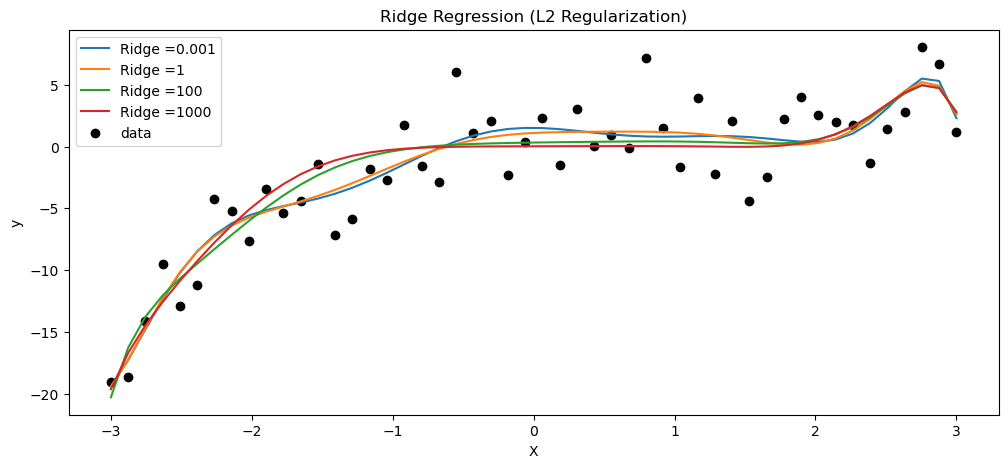

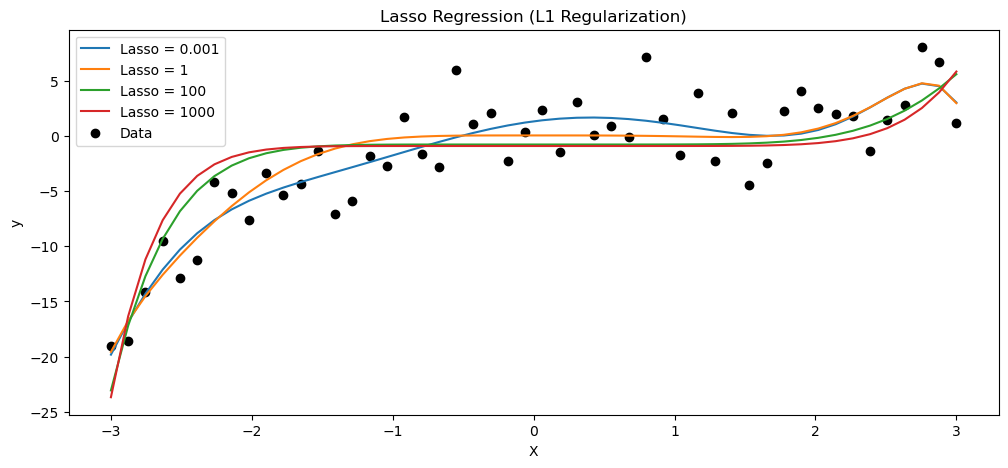

Ridge coefficients (alpha=1):
[ 5.52881300e-01 -1.28283486e+00  1.36944615e+00 -1.20862922e-01
 -6.67017784e-01  8.68883904e-02  1.22949136e-01 -9.91757035e-03
 -6.82974312e-03  2.29318150e-04]

Lasso coefficients (alpha=1):
[ 0.         -0.          0.         -0.15698474  0.09619719 -0.02305077
 -0.          0.00995027 -0.00061517 -0.00074699]


C:\Users\Ganesh\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.995e+01, tolerance: 1.730e-01
  model = cd_fast.enet_coordinate_descent(


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Create dataset with noise to cause overfitting
np.random.seed(42)
# Input feature
X = np.linspace(-3,3,50).reshape(-1,1)

# True function + noise
y = 0.5*X.squeeze()**3 - X.squeeze()**2 + 2 + np.random.randn(50)*3

# Create polynomial features (high-degree -- > overfitting risk)
def polynomial_features(X,degree=10):
    return np.hstack([X**i for i in range(1,degree+1)])
X_poly = polynomial_features(X,degree=10)

# Train ridge regression with different alpha values
alphas = [0.001,1,100,1000]
plt.figure(figsize=(12,5))

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_poly,y)
    
    y_pred = ridge.predict(X_poly)
    plt.plot(X,y_pred,label=f"Ridge ={alpha}")
    
# Plot ridge results
plt.scatter(X,y,color='black',label='data')
plt.title("Ridge Regression (L2 Regularization)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Train Lasso Regression with different alpha values 
plt.figure(figsize=(12,5))

for alpha in alphas:
    lasso = Lasso(alpha=alpha,max_iter=5000)
    lasso.fit(X_poly,y)
    
    y_pred = lasso.predict(X_poly)
    plt.plot(X,y_pred,label=f"Lasso = {alpha}")
    
    
# Plot Lasso results

plt.scatter(X, y, color='black', label='Data')
plt.title("Lasso Regression (L1 Regularization)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


# Observe effect on coefficients (very important)

print("Ridge coefficients (alpha=1):")
print(Ridge(alpha=1).fit(X_poly, y).coef_)

print("\nLasso coefficients (alpha=1):")
print(Lasso(alpha=1, max_iter=5000).fit(X_poly, y).coef_)


### Example 2: Lasso and Ridge Regression with proper dataset

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

In [48]:
# Load Data set
data = load_diabetes()
X,y = data.data,data.target
# Train Test Split 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Feature Scaling (mandatory for regularization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

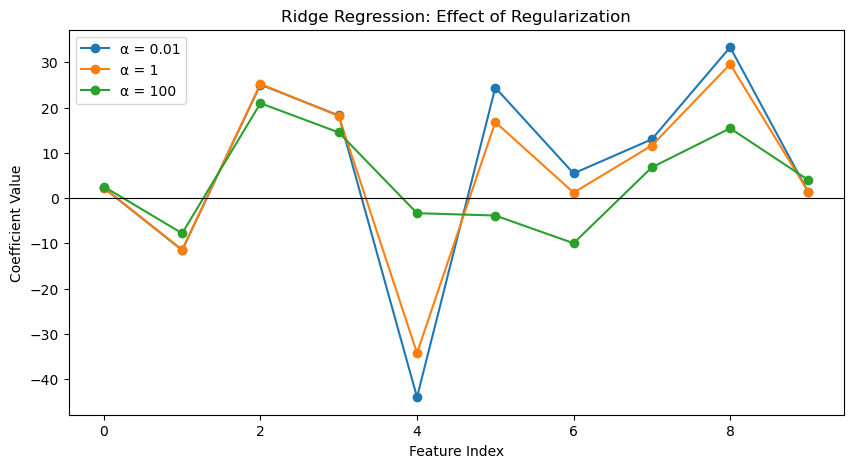

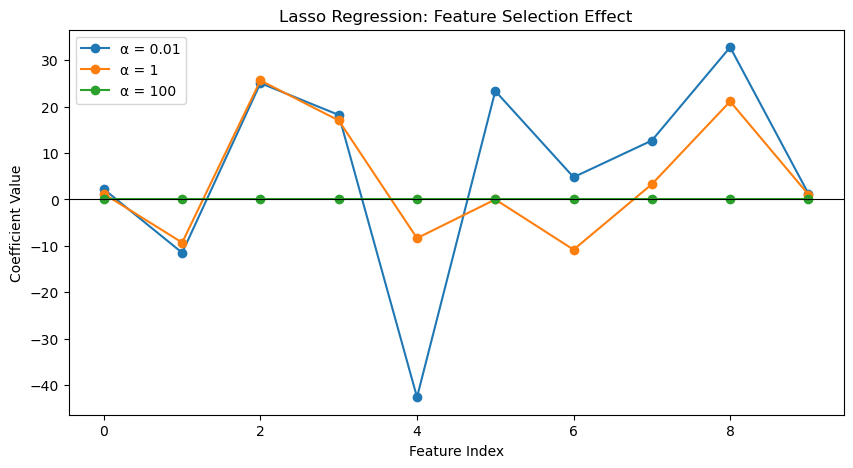

Model Performance (MSE)

Alpha = 0.01
  Ridge MSE : 2848.23
  Lasso MSE : 2847.18

Alpha = 1
  Ridge MSE : 2842.83
  Lasso MSE : 2784.98

Alpha = 100
  Ridge MSE : 2817.50
  Lasso MSE : 5607.20



In [55]:
# Train Ridge Regression with different alpha values
alphas = [0.01,1,100]
ridge_coef = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    ridge_coef.append(ridge.coef_)

# Visualize Ridge coefficient shrinkage
plt.figure(figsize=(10,5))
for coef, alpha in zip(ridge_coef,alphas):
    plt.plot(coef, marker='o',label = f"α = {alpha}")

plt.axhline(0,color='black',linewidth=0.8)
plt.title("Ridge Regression: Effect of Regularization")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()

# Train Lasso Regression with different alpha values

lasso_coef = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=5000)
    lasso.fit(X_train,y_train)
    lasso_coef.append(lasso.coef_)
    
# Visualize Lasso coefficient sparsity

plt.figure(figsize=(10, 5))

for coef, alpha in zip(lasso_coef, alphas):
    plt.plot(coef, marker='o', label=f"α = {alpha}")

plt.axhline(0, color='black', linewidth=0.8)
plt.title("Lasso Regression: Feature Selection Effect")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()

# Compare model performance (MSE)

from sklearn.metrics import mean_squared_error

print("Model Performance (MSE)\n")

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    lasso = Lasso(alpha=alpha, max_iter=5000).fit(X_train, y_train)

    ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))
    lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))

    print(f"Alpha = {alpha}")
    print(f"  Ridge MSE : {ridge_mse:.2f}")
    print(f"  Lasso MSE : {lasso_mse:.2f}\n")


### From-scratch implementation of Ridge and Lasso regression using only NumPy.

Alpha=0, Weights=[0.13077868 2.88375008]
Alpha=0.1, Weights=[0.21191964 2.86320087]
Alpha=1, Weights=[0.35328126 2.76849793]
Alpha=10, Weights=[0.3219275  2.20156993]
Alpha=0, Weights=[-1.29721728e+139  6.48608642e+139]
Alpha=0.1, Weights=[-1.31588633e+139  6.57943165e+139]
Alpha=1, Weights=[-1.48390774e+139  7.41953872e+139]
Alpha=10, Weights=[-3.16412187e+139  1.58206093e+140]


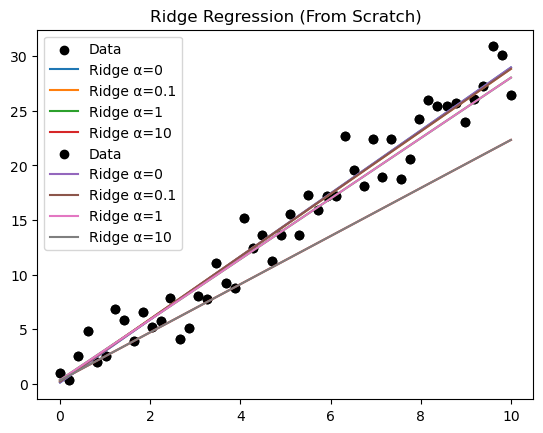

In [57]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate data
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.randn(50) * 2

# Add bias term (column of ones)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Mean Squared Error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Ridge Regression (L2) – From Scratch
def ridge_regression(X, y, lr=0.01, epochs=1000, alpha=1.0):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)

    for _ in range(epochs):
        y_pred = X @ w
        error = y_pred - y

        # Gradient of Ridge loss
        dw = (2 / n_samples) * (X.T @ error) + 2 * alpha * w
        w -= lr * dw

    return w

# Train Ridge models with different alpha values
alphas = [0, 0.1, 1, 10]
ridge_weights = []

for alpha in alphas:
    w = ridge_regression(X, y, alpha=alpha)
    ridge_weights.append(w)
    print(f"Alpha={alpha}, Weights={w}")

# Lasso Regression (L1) – From Scratch. Soft Thresholding Function
def soft_threshold(rho, alpha):
    if rho > alpha:
        return rho - alpha
    elif rho < -alpha:
        return rho + alpha
    else:
        return 0.0
# Lasso Regression using Coordinate Descent
def lasso_regression(X, y, alpha=1.0, epochs=100):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)

    for _ in range(epochs):
        for j in range(n_features):
            y_pred = X @ w
            residual = y - y_pred + w[j] * X[:, j]

            rho = np.sum(X[:, j] * residual) / n_samples
            w[j] = soft_threshold(rho, alpha)

    return w

# Train Lasso models with different alpha values
lasso_weights = []

for alpha in alphas:
    w = lasso_regression(X, y, alpha=alpha)
    lasso_weights.append(w)
    print(f"Alpha={alpha}, Weights={w}")

# Visual comparison of predictions
plt.scatter(X[:, 1], y, color='black', label='Data')

x_plot = X[:, 1]

for w, alpha in zip(ridge_weights, alphas):
    y_pred = X @ w
    plt.plot(x_plot, y_pred, label=f"Ridge α={alpha}")

plt.legend()
plt.title("Ridge Regression (From Scratch)")
# plt.show()

plt.scatter(X[:, 1], y, color='black', label='Data')

x_plot = X[:, 1]

for w, alpha in zip(ridge_weights, alphas):
    y_pred = X @ w
    plt.plot(x_plot, y_pred, label=f"Ridge α={alpha}")

plt.legend()
plt.title("Ridge Regression (From Scratch)")
plt.show()
